In [531]:
# import the pandas library
import pandas as pd
from matplotlib import pyplot as plt

In [532]:
# import the database
maindf = pd.read_csv(r"./CSV_Files/ebola_data_db_format.csv")

In [533]:
# A samle of five random row from the database
maindf.sample(n=5)

,Indicator,Country,Date,value
7334,Cumulative number of probable Ebola deaths,Spain,2015-05-11,0.0
6719,"Cumulative number of confirmed, probable and s...",Guinea,2015-04-27,2374.0
7916,"Cumulative number of confirmed, probable and s...",Mali,2015-05-22,8.0
9153,Cumulative number of suspected Ebola cases,Senegal,2015-06-17,0.0
15424,Cumulative number of confirmed Ebola cases,Liberia,2015-10-22,3151.0


In [534]:
# Columns in dataframe and their respective datatypes
maindf.dtypes

Indicator     object
Country       object
Date          object
value        float64
dtype: object

In [535]:
# rename column 'value' as 'Value'
maindf = maindf.rename(columns = { "value": "Value"})

In [536]:
# dimensions of the database
maindf.shape

(17585, 4)

In [537]:
# number of unqiue values in each column
for col in maindf.columns:
    print (col + ": {}".format(maindf[col].unique().size))

Indicator: 36
Country: 12
Date: 259
Value: 1793


In [538]:
# unique values in each column
for col in ["Indicator", "Country"]:
    print (col)
    print ("{}".format(maindf[col].value_counts()))
    print ("\n")

Indicator
Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed Ebola cases in the last 21 days                                             190
Number of confirmed, probable and suspected Ebola cases in the last 21 days               

### The 'Country' column has two countries labelled as Guinea- 'Guinea' and 'Guinea 2'
### And also two countries labelled as Liberia- 'Liberia' and 'Liberia 2'

In [539]:
# First ten rows of Guinea
maindf.loc[maindf["Country"]=="Guinea"].head(10)

,Indicator,Country,Date,Value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
5,Cumulative number of confirmed Ebola deaths,Guinea,2015-03-10,1778.0
6,Cumulative number of probable Ebola deaths,Guinea,2015-03-10,392.0
66,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-06,3248.0
67,Cumulative number of confirmed Ebola cases,Guinea,2015-03-06,2840.0
68,Cumulative number of probable Ebola cases,Guinea,2015-03-06,392.0


In [540]:
# Last ten rows of Guinea
maindf.loc[maindf["Country"]=="Guinea"].tail(10)

,Indicator,Country,Date,Value
17448,"Cumulative number of confirmed, probable and s...",Guinea,2015-12-29,3804.0
17449,Cumulative number of confirmed Ebola cases,Guinea,2015-12-29,3351.0
17450,Cumulative number of probable Ebola cases,Guinea,2015-12-29,453.0
17502,Cumulative number of confirmed Ebola cases,Guinea,2016-03-23,3351.0
17503,Cumulative number of probable Ebola cases,Guinea,2016-03-23,453.0
17504,Cumulative number of suspected Ebola cases,Guinea,2016-03-23,0.0
17505,"Cumulative number of confirmed, probable and s...",Guinea,2016-03-23,3804.0
17506,Cumulative number of confirmed Ebola deaths,Guinea,2016-03-23,2083.0
17507,Cumulative number of probable Ebola deaths,Guinea,2016-03-23,453.0
17508,"Cumulative number of confirmed, probable and s...",Guinea,2016-03-23,2536.0


In [541]:
# Rows of country 'Guinea 2'
maindf.loc[maindf["Country"]=="Guinea 2"]

,Indicator,Country,Date,Value
17528,Cumulative number of confirmed Ebola cases,Guinea 2,2016-03-23,2.0
17529,Cumulative number of probable Ebola cases,Guinea 2,2016-03-23,3.0
17530,Cumulative number of suspected Ebola cases,Guinea 2,2016-03-23,0.0
17531,"Cumulative number of confirmed, probable and s...",Guinea 2,2016-03-23,5.0
17532,Number of confirmed Ebola cases in the last 21...,Guinea 2,2016-03-23,2.0
17533,Number of probable Ebola cases in the last 21 ...,Guinea 2,2016-03-23,3.0
17534,"Number of confirmed, probable and suspected Eb...",Guinea 2,2016-03-23,5.0
17535,Cumulative number of confirmed Ebola deaths,Guinea 2,2016-03-23,1.0
17536,Cumulative number of probable Ebola deaths,Guinea 2,2016-03-23,3.0
17537,"Cumulative number of confirmed, probable and s...",Guinea 2,2016-03-23,4.0


### On inspection of the dates, we find that 'Guinea' and 'Guinea 2' have different records for the same date.
### Information available on the internet provides us with sufficient information to confirm that 'Guinea 2' refers to the country- Guinea Bissua.
### In order to make it clear, we change the name 'Guinea 2' to 'Guinea B'

In [542]:
# renaming 'Guinea 2' to 'Guinea B'
maindf.loc[maindf["Country"]=="Guinea 2", "Country"] = "Guinea Bissua"

In [543]:
maindf.loc[maindf["Country"]=="Guinea Bissua"]

,Indicator,Country,Date,Value
17528,Cumulative number of confirmed Ebola cases,Guinea Bissua,2016-03-23,2.0
17529,Cumulative number of probable Ebola cases,Guinea Bissua,2016-03-23,3.0
17530,Cumulative number of suspected Ebola cases,Guinea Bissua,2016-03-23,0.0
17531,"Cumulative number of confirmed, probable and s...",Guinea Bissua,2016-03-23,5.0
17532,Number of confirmed Ebola cases in the last 21...,Guinea Bissua,2016-03-23,2.0
17533,Number of probable Ebola cases in the last 21 ...,Guinea Bissua,2016-03-23,3.0
17534,"Number of confirmed, probable and suspected Eb...",Guinea Bissua,2016-03-23,5.0
17535,Cumulative number of confirmed Ebola deaths,Guinea Bissua,2016-03-23,1.0
17536,Cumulative number of probable Ebola deaths,Guinea Bissua,2016-03-23,3.0
17537,"Cumulative number of confirmed, probable and s...",Guinea Bissua,2016-03-23,4.0


### Checking whether same 'Indicator' and 'Date' have different corresponding 'Value' for 'Liberia' and 'Liberia 2'

In [544]:
maindf.loc[(maindf["Country"]=="Liberia") & 
           (maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola cases") & 
           (maindf["Date"]=="2015-12-22")]

,Indicator,Country,Date,Value
17290,"Cumulative number of confirmed, probable and s...",Liberia,2015-12-22,10666.0


In [545]:
maindf.loc[(maindf["Country"]=="Liberia 2") & 
           (maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola cases") & 
           (maindf["Date"]=="2015-12-22")]

,Indicator,Country,Date,Value
17304,"Cumulative number of confirmed, probable and s...",Liberia 2,2015-12-22,9.0


### The two values are drastically different. There is no certainty what Liberia 2 refers too. 
### Therefore, we drop the rows with 'Country' as 'Liberia 2'

In [546]:
# number of rows with 'Country' as 'Liberia 2'
maindf.loc[maindf["Country"]=="Liberia 2","Country"].size

536

In [547]:
# Dropping the rows with 'Country'='Liberia 2'
maindf = maindf.drop(maindf[maindf["Country"]=="Liberia 2"].index)

In [548]:
# number of unqiue values in each column
# note: number of countries ha reduced to 11 from 12
for col in maindf.columns:
    print (col + ": {}".format(maindf[col].unique().size))

Indicator: 36
Country: 11
Date: 259
Value: 1793


In [549]:
# New dimensions of the dataframe
maindf.shape

(17049, 4)

### Calculating the percentages of Cumulative confirmed, probable and suspected cases till the last date of reporting (23-03-2016)

In [550]:
# Cumulative number of confirmed, probable and suspected Ebola cases till the last reported date of 23-03-2016 
# in descending number of cases
maindf.loc[(maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola cases") & 
           (maindf["Date"]=="2016-03-23"), ["Country", "Value"]].sort_values(by=["Value"], ascending=False)

,Country,Value
17517,Sierra Leone,14122.0
17512,Liberia,10666.0
17505,Guinea,3804.0
17556,Nigeria,20.0
17552,Mali,8.0
17531,Guinea Bissua,5.0
17568,United States of America,4.0
17542,Italy,1.0
17547,United Kingdom,1.0
17560,Senegal,1.0


In [551]:
country1 = maindf.loc[(maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola cases") & 
           (maindf["Date"]=="2016-03-23"), ["Country", "Value"]].sort_values(by=["Value"], ascending=False)["Country"].tolist()
print (country1)

['Sierra Leone', 'Liberia', 'Guinea', 'Nigeria', 'Mali', 'Guinea Bissua', 'United States of America', 'Italy', 'United Kingdom', 'Senegal', 'Spain']


In [552]:
val = pd.Series(maindf.loc[(maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola cases") & 
           (maindf["Date"]=="2016-03-23"), ["Value"]].sort_values(by=["Value"], ascending=False)["Value"].tolist())
val.tolist()

[14122.0, 10666.0, 3804.0, 20.0, 8.0, 5.0, 4.0, 1.0, 1.0, 1.0, 1.0]

C:\Users\arshi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:521: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


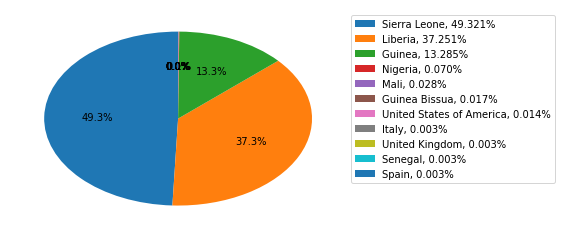

In [553]:
plt.pie(val, autopct="%1.1f%%", startangle=90)
plt.legend(country1, bbox_to_anchor=(1,1), labels=['%s, %1.3f%%' % (c, v) for c, v in zip(country1, ((val/val.sum())*100))])

### Rising trend in cumulatives number of confirmed, probable and suspected Ebola cases

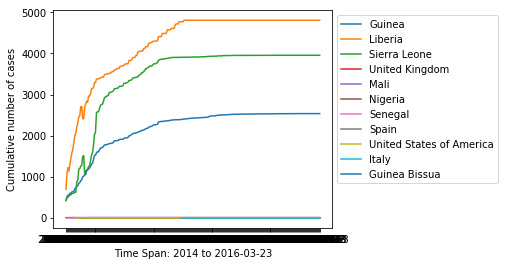

In [668]:
for country in maindf["Country"].unique().tolist():
    
    date = maindf.loc[(maindf["Country"]==country) & 
               (maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola deaths"),
                ["Date", "Value"]].sort_values(by=["Date"])["Date"].tolist()

    cumvalue = maindf.loc[(maindf["Country"]==country) & 
               (maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola deaths"),
                ["Date", "Value"]].sort_values(by=["Date"])["Value"].tolist()
    plt.plot(date, cumvalue, label=country)
 
plt.xlabel("Time Span: 2014 to 2016-03-23")
plt.ylabel("Cumulative number of cases")
plt.legend(bbox_to_anchor=(1,1))

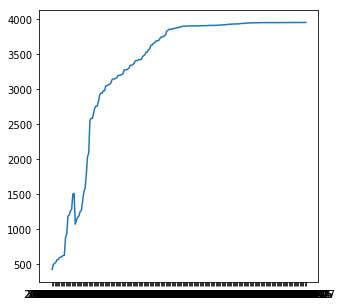

In [665]:
    date = maindf.loc[(maindf["Country"]=="Sierra Leone") & 
               (maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola deaths")&
               (maindf["Date"]<="2015-09-17"), 
                ["Date", "Value"]].sort_values(by=["Date"])["Date"].tolist()

    cumvalue = maindf.loc[(maindf["Country"]=="Sierra Leone") & 
               (maindf["Indicator"]=="Cumulative number of confirmed, probable and suspected Ebola deaths")&
               (maindf["Date"]<="2015-09-17"), 
                ["Date", "Value"]].sort_values(by=["Date"])["Value"].tolist()
    
    plt.legend()
   # plt.figure(figsize=(20,20))
    plt.plot(date, cumvalue)
    plt.rcParams["figure.figsize"]=(5,4)
    
plt.legend()